# Dataset

In this task we will use dataset of **red wine samples**. The goal is to predict wine quality based on physicochemical parameters of the sample.

More info: https://archive.ics.uci.edu/dataset/186/wine+quality

Let's download the dataset...

In [1]:
!curl -O https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -o wine+quality.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 12213    0 12213    0     0   3210      0 --:--:--  0:00:03 --:--:--  3212
100 91353    0 91353    0     0  22092      0 --:--:--  0:00:04 --:--:-- 22108
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


... and load it into Pandas dataframe.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("winequality-red.csv", delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As you can see, the table contains samples of the wine (rows) and values of various physicochemical parameters (columns) of the sample. The last column is quality evaluation of the particular wine sample done by expert.

## Task 1: Explore the dataset
Before building any ML model the good practice is to get understanding of your data and find if there any unexpected values (e.g. missing values, or extremely low/high values).

One of the simplest approaches is plotting a histogram: it shows how often specific value appears in the data set.

Another approach is to plot kernel density estimation (KDE), which is very similar to the histogram but represents distribution of the values.

Yet another approach to investigate the dataset is to display boxplot: it graphically shows main statistical properties (median, quartiles and outliers).

### TODOs and hints
For each column in the dataset:

1. Plot histogram
  * you can use Pandas wrapper (e.g `column.plot.hist`) or Matplotlib functions directly (e.g. `plt.hist`);
  * use at least 30 bins for the histograms.

2. Plot KDE
  * use Pandas wrapper (e.g. `column.plot.density`) or similar in other libraries.
  * try to group results by wine quality (e.g. `data.groupby("quality")` ).

3. Make boxplot
  * use `dataframe.plot.box` or `plt.boxplot`.

* Hint: Start with one column, then extend into loop over multiple columns.
* Hint: Try to use subplots instead of separate figures for each type of plots (e.g. `plt.subplots` or via Pandas wrappers).
* Hint: Make sure your plots "look nice" (axis has readable labels, legend is provided where needed, etc).


An example of plots for `Alcohol` column is shown below. Your task is to produce similar images for all parameters.

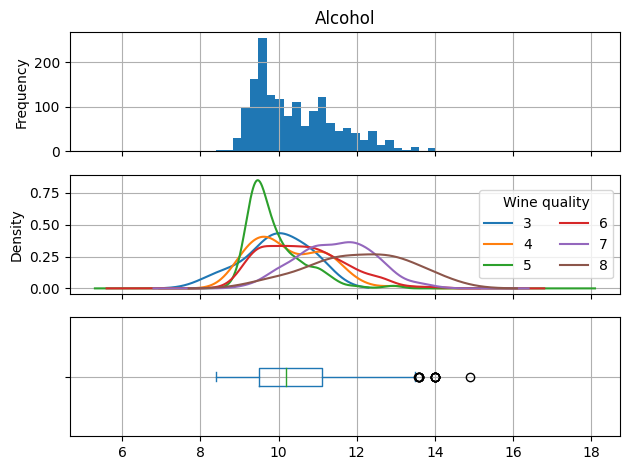

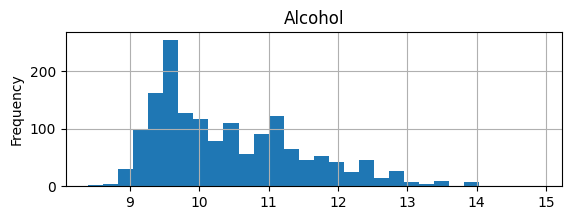

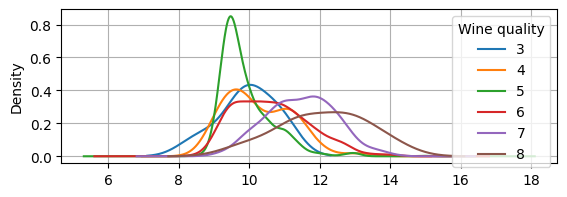

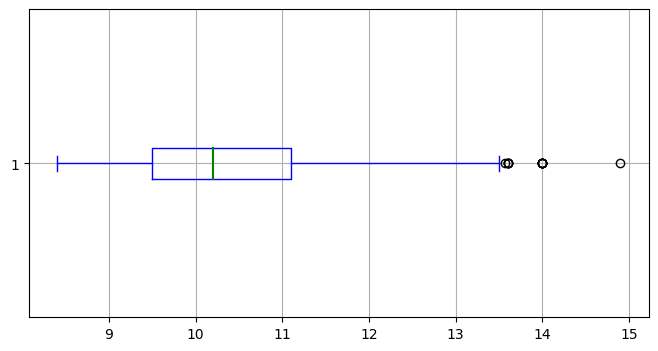

In [8]:
# TODO: add your code here

# 1. Plot histogram
#plt.figure(figsize=(10, 6))
plt.figure().set_figheight(2)
plt.title('Alcohol')
data['alcohol'].plot(kind='hist', bins=30)
plt.grid(True)


# 2. Plot KDE
plt.figure().set_figheight(2)
#plt.figure(figsize=(10, 6))
data.groupby("quality")['alcohol'].plot.density()
plt.grid(True)
plt.legend(title = "Wine quality")


# 3. Make boxplot
plt.figure(figsize=(8, 4))
bp = plt.boxplot(data['alcohol'], vert = 0, widths=0.1, medianprops = dict(linewidth=1.5, color='green'), whiskerprops = dict(color ='blue'), capprops= dict(color = 'blue'), boxprops= dict(color = 'blue'))

#for box, line_list in bp.items():
#    for line in line_list:
#       line.set_color('b')       
        
plt.grid(True)     

  

# Linear regression model

In previous stage we have explored the dataset. If any problem was identified if should be fixed by now (e.g. wrong values corrected).

Now your task is to train **linear regression model** for the wine dataset. The ultimate goal is to provide physicochemical parameters to the model and get wine quality prediction without need for a human expert.

The task of linear regression is to find such values of $w_n$ and $b$ variables, so that following equation describes the data as **precisely as possible**.

$$\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + ... + b$$

The inputs $x_n$ for the model are various physicochemical parameters of the wine, and the expected output $\hat{y}$ is wine quality.

## Task 2: Train linear regression model

### Train and test datasets
First of all, we have one big dataset of wine samples. If we use all available samples for training the model (fitting the variables), we won't be able to check how well our model is trained.

Thus usual approach is to "hide" part of samples from the model during the training, and use it later for testing the model.

Also as a naming convention it is recommended to have separate objects for input values and expected output values. Input values are usually designated as uppercase `X`, output values - as lowercase `y`. Keep in mind that `X` variable might be a table containing all input values.

Also different "subtypes" of these variables are often used, e.g. `X_test`, `y_train`, `X_batch`, `y_eval`, etc.

### TODOs and hints
1. Define variables for input and output values
  * follow naming conventions, e.g. use `y_data` for `quality` column, and `X_data` for the rest of columns.
  * store all samples (rows) in these variables;
  * use Pandas syntax to select specific columns, e.g. `X_data = data[["alcohol", "pH"]]`.

2. Split the dataset into `train` and `test` parts.
  * use `train_test_split` function;
  * use `20%` of samples for testing;
  * Hint: store results in variables `X_train`, `X_test`, `y_train`, `y_test`;

3. Create and train the model
  * create new instance of `LinearRegression` class;
  * train the model by calling its `fit` method;
  * provide `train` dataset for the method.

4. Evaluate the model
  * Print $R^2$ score (the coefficient of determination) of the model (use `score` method with the `test` dataset).
  * Print actual $w_n$ and $b$ values of the linear regression equation (use `coef_` and `intercept_` properties).
  * Use `predict` method to get model outputs for `test` dataset.
  * Compare true values from `y_test` and the values predicted by the model.
    * Use any type of plot to show differences between true and predicted values (e.g. compare distributions).
    * An example of histogram is shown below.
  * Make conclusions about the performance of the model. How good is it in your opinion?

* Hint: refer to the documentation of a specific function/library if you are not sure what kind of parameters it uses or results produce.






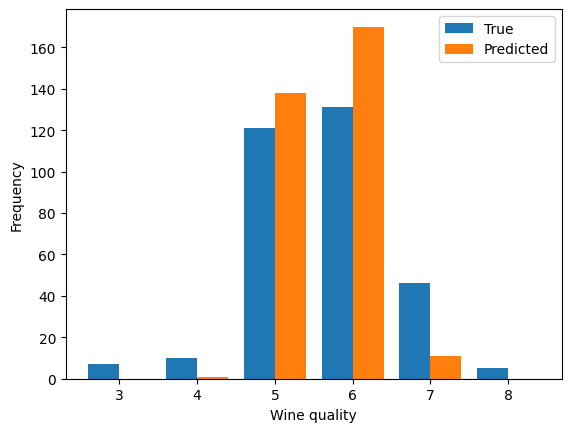

In [ ]:
# Note: we can import specific functions or classes from the library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# TODO: add your code here



# Final notes

Now when the model is trained, we potentially can use it to evaluate the wine quality.

For example, if we got physicochemical parameters of the wine from lab, we can evaluate it as follows. Or we can extract equation coeffiecients and use them in any other software (e.g. mobile or Web app).

In [95]:
inputs = pd.DataFrame([{
          'fixed acidity': 11.2,
          'volatile acidity': 0.28,
          'citric acid': 0.56,
          'residual sugar': 1.9,
          'chlorides': 0.075,
          'free sulfur dioxide': 17.0,
          'total sulfur dioxide': 60.0,
          'density': 0.9980,
          'pH': 3.16,
          'sulphates': 0.58,
          'alcohol': 9.8
        }])
quality = model.predict(inputs)
print(f"Quality of the sample is {quality[0]:.3}")

NameError: name 'model' is not defined